In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('paper',
        'white',
        rc={'font.size': 10,
            'axes.labelsize': 10,
            'legend.fontsize': 8,
            'axes.titlesize': 10,
            'xtick.labelsize': 8,
            'ytick.labelsize': 8,
            "pgf.rcfonts": False})

In [2]:
alpha_count = np.fromstring(
"""0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 20 4 6 8 6 4 4 20 2 4 1 9 3 2 5 27
0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 6 0 3 2 3 1 3 2 2 4 0 4 3
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 5 2 6 7 5 2 4 3 5 2 1 1 3 0 5
0 0 0 0 0 0 0 0 0 0 1 2 3 3 2 4 1 6 4 3 3 1 4 1 4 3 0 2 1 0 0 1 7
0 0 0 0 0 0 0 0 0 1 0 0 2 1 2 2 2 8 8 11 8 9 6 3 6 4 2 2 6 1 1 1 9
0 0 0 0 0 0 0 0 0 0 5 2 5 2 3 3 3 6 11 11 12 6 1 2 6 1 1 5 0 1 0 1 8
0 0 0 0 0 0 0 0 1 0 2 5 6 3 4 1 3 19 14 17 11 8 6 3 7 3 5 3 6 1 0 1 2
1 0 0 0 0 0 0 0 1 0 2 7 4 6 5 9 5 23 26 40 29 21 16 13 11 6 3 2 2 2 0 1 4
2 0 0 1 0 0 0 0 2 2 6 4 28 21 32 36 9 189 118 123 90 64 62 27 75 13 18 14 22 5 4 6 24
0 0 0 0 0 0 1 0 1 4 8 27 25 34 67 83 33 135 128 113 77 52 34 26 25 6 10 4 5 4 1 2 4
0 0 0 0 0 0 1 0 0 3 16 68 92 131 209 305 134 682 555 259 286 147 145 46 88 31 23 14 22 8 3 4 18
0 0 0 0 1 0 1 0 8 16 25 165 504 667 982 1293 1080 4964 2990 1432 1096 768 510 250 337 141 73 71 78 35 17 23 74
0 1 1 0 0 1 2 3 6 10 43 258 914 1231 2016 2755 2589 12046 6199 3089 2562 1091 768 264 480 105 72 60 79 26 24 22 102
1 0 0 0 0 0 0 2 23 15 52 233 1455 2830 4214 5834 9911 20868 10673 6376 3035 1184 573 241 317 69 47 28 43 17 9 24 76
0 0 0 0 0 0 0 1 24 18 71 403 3414 7723 12447 15969 39536 73203 39303 12162 4871 1389 749 196 409 76 48 36 68 20 15 13 124
0 0 0 0 0 0 1 1 19 22 87 702 6443 18508 36074 53386 98588 160306 39671 9416 3001 826 449 137 301 47 33 26 67 5 11 14 108
0 3 4 2 8 2 5 12 5 32 79 1044 12664 79749 255940 401605 0 43096 10240 2034 651 209 69 36 15 2 4 0 3 2 1 2 0
14 0 1 2 6 8 15 23 344 188 679 3646 24505 50313 165476 268278 20306 5840 2823 1283 609 322 135 57 70 37 20 24 18 4 3 20 28
2 2 3 1 3 4 14 24 166 135 461 2478 14479 28377 74261 47867 3861 2078 1088 516 238 113 54 28 25 15 6 12 17 7 7 13 36
2 1 1 2 3 9 12 25 111 110 391 2120 9440 14766 18983 10721 691 750 396 176 82 33 23 3 11 4 4 2 5 2 0 4 13
3 0 5 3 4 8 12 40 172 160 507 1670 7107 6187 7568 4291 195 366 210 90 34 18 13 9 19 5 4 3 6 0 2 6 13
0 0 2 2 7 6 12 49 152 145 301 996 2762 2259 2668 1448 92 136 127 64 23 17 8 2 2 2 4 1 4 1 3 4 13
5 0 1 3 4 7 13 48 128 110 239 503 1754 1293 1782 821 36 73 77 35 17 19 16 5 5 4 0 3 3 0 1 7 12
1 1 1 1 3 6 2 17 66 82 58 191 681 582 611 337 25 16 33 13 10 5 9 5 2 3 1 2 5 0 1 0 8
13 3 5 4 16 21 13 22 152 42 84 240 1009 901 1159 824 6 22 35 16 9 5 5 4 14 1 4 3 0 1 1 8 11
8 6 2 2 5 4 6 13 26 9 20 63 248 260 291 175 2 10 6 5 5 3 2 1 1 2 1 0 1 1 2 0 3
4 4 5 2 4 2 3 6 15 11 12 42 199 146 221 140 6 6 7 3 1 1 3 1 2 1 0 0 1 0 0 2 3
5 1 3 0 2 1 3 4 17 4 7 35 134 116 161 88 2 13 3 1 5 1 4 2 6 2 1 1 1 0 1 2 2
11 6 1 3 8 9 6 5 16 5 19 56 240 153 292 168 2 15 4 4 2 1 2 0 6 3 1 0 0 0 1 0 4
4 1 1 3 3 1 0 2 4 1 2 18 97 81 70 35 1 8 3 4 1 0 0 1 1 0 1 0 0 0 1 0 0
3 0 0 2 0 2 3 0 6 2 1 25 65 64 53 33 3 19 5 0 1 1 2 0 1 1 2 0 0 0 0 0 0
5 2 5 3 1 2 2 2 6 2 5 28 122 109 93 35 1 27 8 2 1 3 1 1 0 1 2 2 0 0 1 3 0
42 5 4 7 0 2 1 9 23 2 32 94 503 300 282 165 0 18 4 6 6 2 2 1 1 1 0 0 0 0 0 0 2""",
sep=' ', dtype=int).reshape((33,33))

In [3]:
def plot_pair_density(counts, name):
    alphas = np.arange(-16, 17) / 8
    prob = counts.clip(1) / counts.sum()
    df = pd.DataFrame(np.log2(prob), index=alphas, columns=alphas)
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.heatmap(df[::-1],
                ax=ax,
                cbar=False,
                square=True,
                xticklabels=2,
                yticklabels=2)
    plt.xlabel('Cb')
    plt.ylabel('Cr')
    plt.tight_layout()
    fig.savefig('%s.pgf' % name)

(0.57447582558702659, 1.2228841586134926e-96)

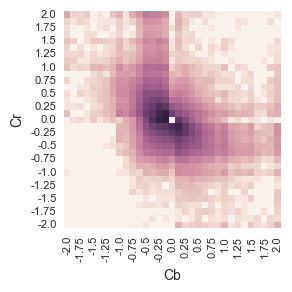

In [4]:
plot_pair_density(alpha_count, 'uv_alpha_raw_prob')
stats.pearsonr(alpha_count.ravel(), alpha_count.T.ravel())

In [5]:
alpha_norm = alpha_count.astype(float)
alpha_norm[:16,:16] /= alpha_norm[:16,:16].sum()
alpha_norm[17:,:16] /= alpha_norm[17:,:16].sum()
alpha_norm[:16,17:] /= alpha_norm[:16,17:].sum()
alpha_norm[17:,17:] /= alpha_norm[17:,17:].sum()
alpha_norm[:16,16] /= alpha_norm[:16,16].sum()
alpha_norm[17:,16] /= alpha_norm[17:,16].sum()
alpha_norm[16,:16] /= alpha_norm[16,:16].sum()
alpha_norm[16,17:] /= alpha_norm[16,17:].sum()
alpha_norm *= alpha_count.sum()

(0.98267623302158658, 0.0)

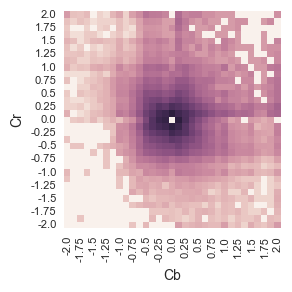

In [6]:
plot_pair_density(alpha_norm, 'uv_alpha_norm_prob')
stats.pearsonr(alpha_norm.ravel(), alpha_norm.T.ravel())

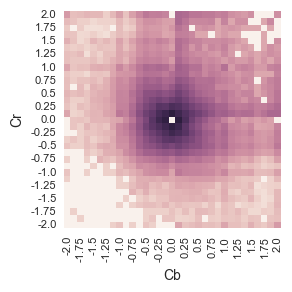

In [7]:
alpha_norm_symm = (alpha_norm + alpha_norm.T) * .5
plot_pair_density(alpha_norm_symm, 'uv_alpha_symm_prob');

(0.99901121782660285, 0.0)

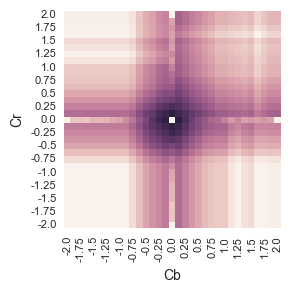

In [8]:
ones_16x16 = np.ones((16, 16))
t = alpha_norm_symm.copy()
for quadrant in [t[:16, :16], t[17:, :16], t[:16, 17:], t[17:, 17:]]:
    def cost_t(x):
        x = x.clip(1)
        v = (x[:16] * ones_16x16).T * x[16:]
        return ((quadrant - v)**2).sum()
    x0 = np.hstack((quadrant.mean(axis=1), quadrant.mean(axis=0)))
    x0 *= np.sqrt(quadrant.sum() / ((x0[:16] * ones_16x16).T * x0[16:]).sum())
    x0 = optimize.fmin(cost_t, x0, maxfun=100000, disp=False).clip(1)
    quadrant[:, :] = (x0[:16] * ones_16x16).T * x0[16:]
alpha_norm_symm_1d = (t + t.T) * .5
plot_pair_density(alpha_norm_symm_1d, 'uv_alpha_1d')
stats.pearsonr(alpha_norm_symm.ravel(), alpha_norm_symm_1d.ravel())

In [9]:
alpha_model = alpha_norm_symm_1d.copy()
alpha_model[:16,:16] *= alpha_count[:16,:16].sum() / alpha_norm[:16,:16].sum()
alpha_model[17:,:16] *= alpha_count[17:,:16].sum() / alpha_norm[17:,:16].sum()
alpha_model[:16,17:] *= alpha_count[:16,17:].sum() / alpha_norm[:16,17:].sum()
alpha_model[17:,17:] *= alpha_count[17:,17:].sum() / alpha_norm[17:,17:].sum()
alpha_model[:16,16] *= alpha_count[:16,16].sum() / alpha_norm[:16,16].sum()
alpha_model[17:,16] *= alpha_count[17:,16].sum() / alpha_norm[17:,16].sum()
alpha_model[16,:16] *= alpha_count[16,:16].sum() / alpha_norm[16,:16].sum()
alpha_model[16,17:] *= alpha_count[16,17:].sum() / alpha_norm[16,17:].sum()

(0.9919703028685164, 0.0)

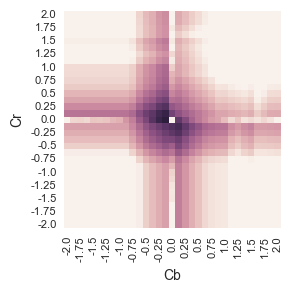

In [10]:
plot_pair_density(alpha_model, 'uv_alpha_model');
stats.pearsonr(alpha_count.ravel(), alpha_model.ravel())

In [11]:
raw_rate = np.sum(alpha_count*-np.log2(alpha_count.clip(1)/alpha_count.sum()))
model_rate = np.sum(alpha_count*-np.log2(alpha_model.clip(1)/alpha_model.sum()))
model_rate / raw_rate - 1

0.019743925400231177